# Week5day1_HomeWrok

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv('/content/drive/MyDrive/income_evaluation.csv adlı dosyanın kopyası')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [22]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [23]:
df.columns = list(map(lambda x: x.strip(), df.columns))
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [24]:
df.drop(['fnlwgt', 'education-num'], axis=1, inplace = True)

In [25]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df['native-country'].replace(' ?', ' United-States', inplace = True)
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
print(df['workclass'].unique())
print(df['occupation'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [28]:
df['workclass'].replace(' ?', ' Private', inplace = True)
df['occupation'].replace(' ?', ' Private', inplace = True)
print(df['workclass'].unique())
print(df['occupation'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Private'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [29]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [30]:
df.education.replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' 12th'], 'School', inplace = True)

In [31]:
df['gain_or_loss'] = df['capital-gain']-df['capital-loss']
df.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)

In [32]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'income', 'gain_or_loss'],
      dtype='object')

# Visualization

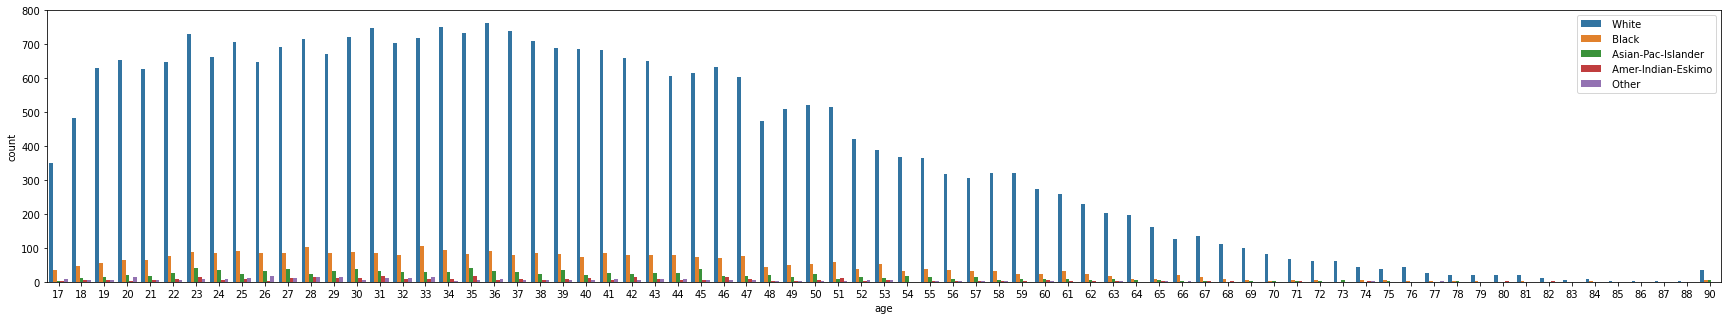

In [44]:
plt.figure(figsize = (30,5))
sns.countplot(data = df, x = 'age', hue = 'race');
plt.legend(loc = 'upper right');

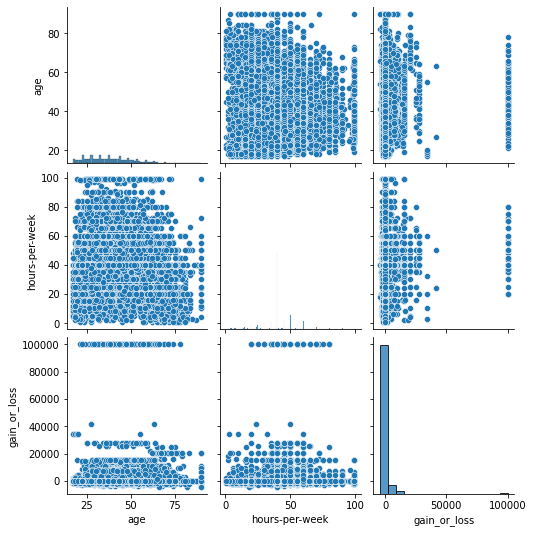

In [ ]:
sns.pairplot(df);

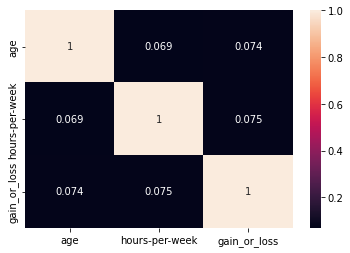

In [ ]:
sns.heatmap(df.corr(), annot = True);

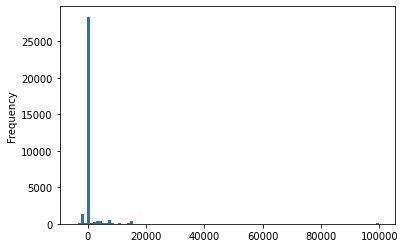

In [ ]:
df['gain_or_loss'].plot(kind = 'hist', bins = 100);

# Preparing and Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
lbe = LabelEncoder()
for i in df[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country','income']].columns:
  df[i] = lbe.fit_transform(df[i]) 

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(df.drop('income', axis = 1))
y = df['income']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [ ]:
log_model = LogisticRegression().fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f'ACCURACY SCORE: \n {accuracy_score(y_test, y_pred)}')
print(f'\n\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}')
print(f'\n\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}')

ACCURACY SCORE: 
 0.8067553735926305


CONFUSION MATRIX: 
 [[3603  173]
 [ 771  338]]


CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      3776
           1       0.66      0.30      0.42      1109

    accuracy                           0.81      4885
   macro avg       0.74      0.63      0.65      4885
weighted avg       0.79      0.81      0.78      4885



In [ ]:
rand_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rand_model.predict(X_test)
print(f'ACCURACY SCORE: \n {accuracy_score(y_test, y_pred)}')
print(f'\n\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}')
print(f'\n\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}')

ACCURACY SCORE: 
 0.8530194472876151


CONFUSION MATRIX: 
 [[3463  313]
 [ 405  704]]


CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      3776
           1       0.69      0.63      0.66      1109

    accuracy                           0.85      4885
   macro avg       0.79      0.78      0.78      4885
weighted avg       0.85      0.85      0.85      4885

